<a href="https://colab.research.google.com/github/classical16/gomycode/blob/main/unsupervised_learning_%3B_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Credit_card_dataset.csv')

In [3]:
print(data.head())
print(data.describe())

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  
       BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8950.000000   8950.000000   8950.000000   8949.000000   
mean            0.877271   1003.204834   1733.143852   4494.449450   
std             0.236904   2136.634782   2895.063757   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.635000    383.276166   1600.000000   
50%             1.000000    361.280000    856.90154

In [4]:
print(data.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [5]:
data.dropna(inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['PURCHASES', 'CREDIT_LIMIT']])

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
data['CUST_ID'] = encoder.fit_transform(data['CUST_ID'])

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [10]:
linkage_matrix = linkage(scaled_features, method='ward')

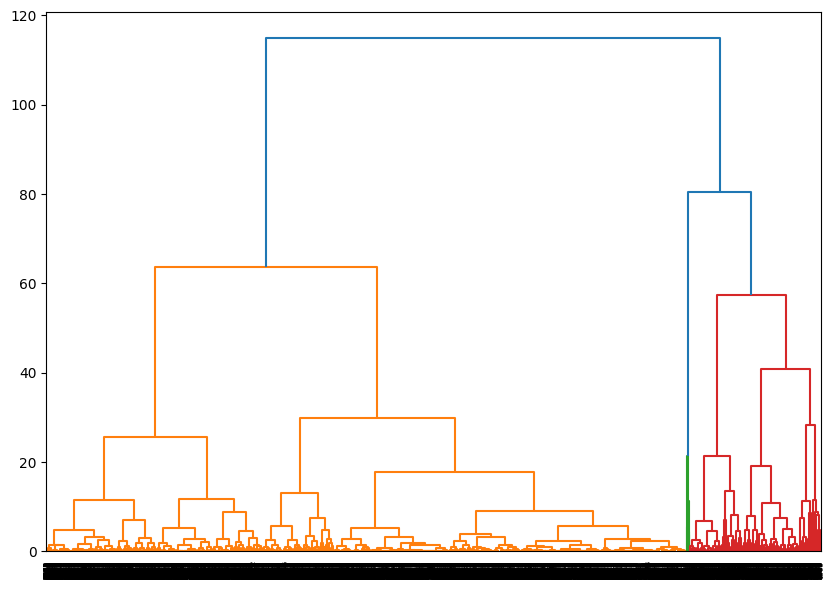

In [11]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
h_cluster=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred=h_cluster.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
data['h_clusters'] = y_pred

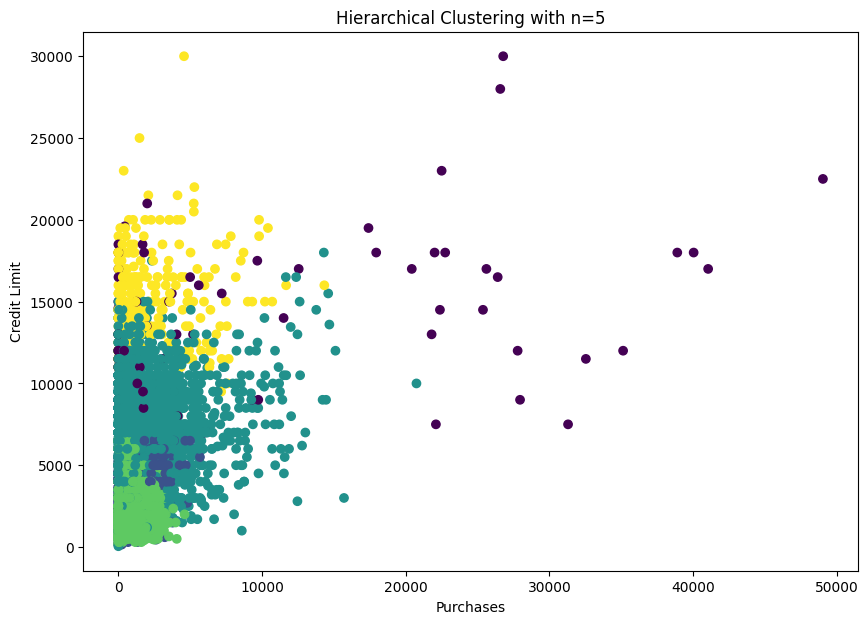

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(data['PURCHASES'], data['CREDIT_LIMIT'], c=data['h_clusters'], cmap='viridis')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.title('Hierarchical Clustering with n=5')
plt.show()


In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [30]:
data['cluster'] = kmeans.labels_


Text(0.5, 1.0, 'k-means Clustering')

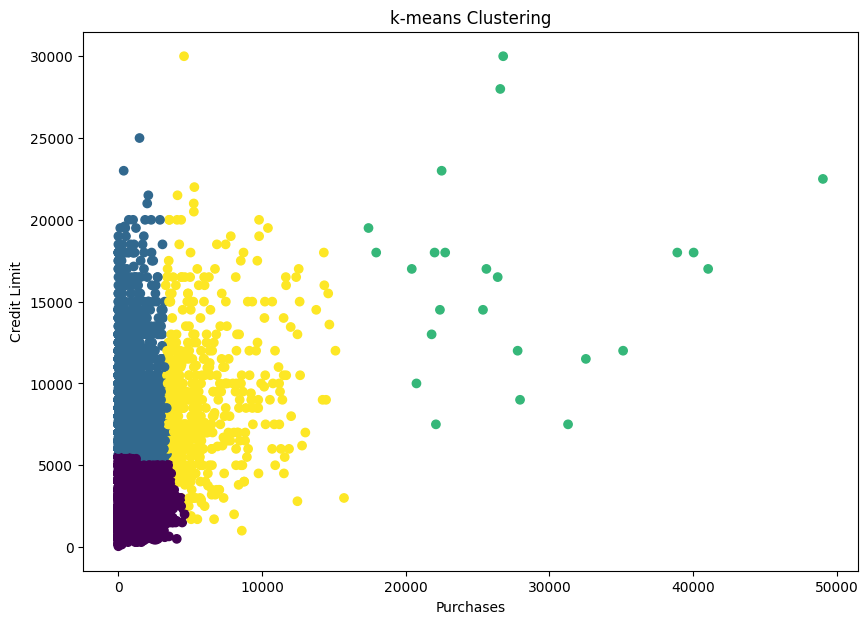

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(data['PURCHASES'], data['CREDIT_LIMIT'], c=data['cluster'], cmap='viridis')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.title('k-means Clustering')

In [32]:
import plotly.express as px